In [28]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn

import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify_songs.csv")

# Strip and lower column names (just in case)
df.columns = df.columns.str.strip().str.lower()

# Preview the data
display(df.head())
print(df.columns.tolist())


Defaulting to user installation because normal site-packages is not writeable
^C


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [ ]:
numeric_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'track_popularity'
]


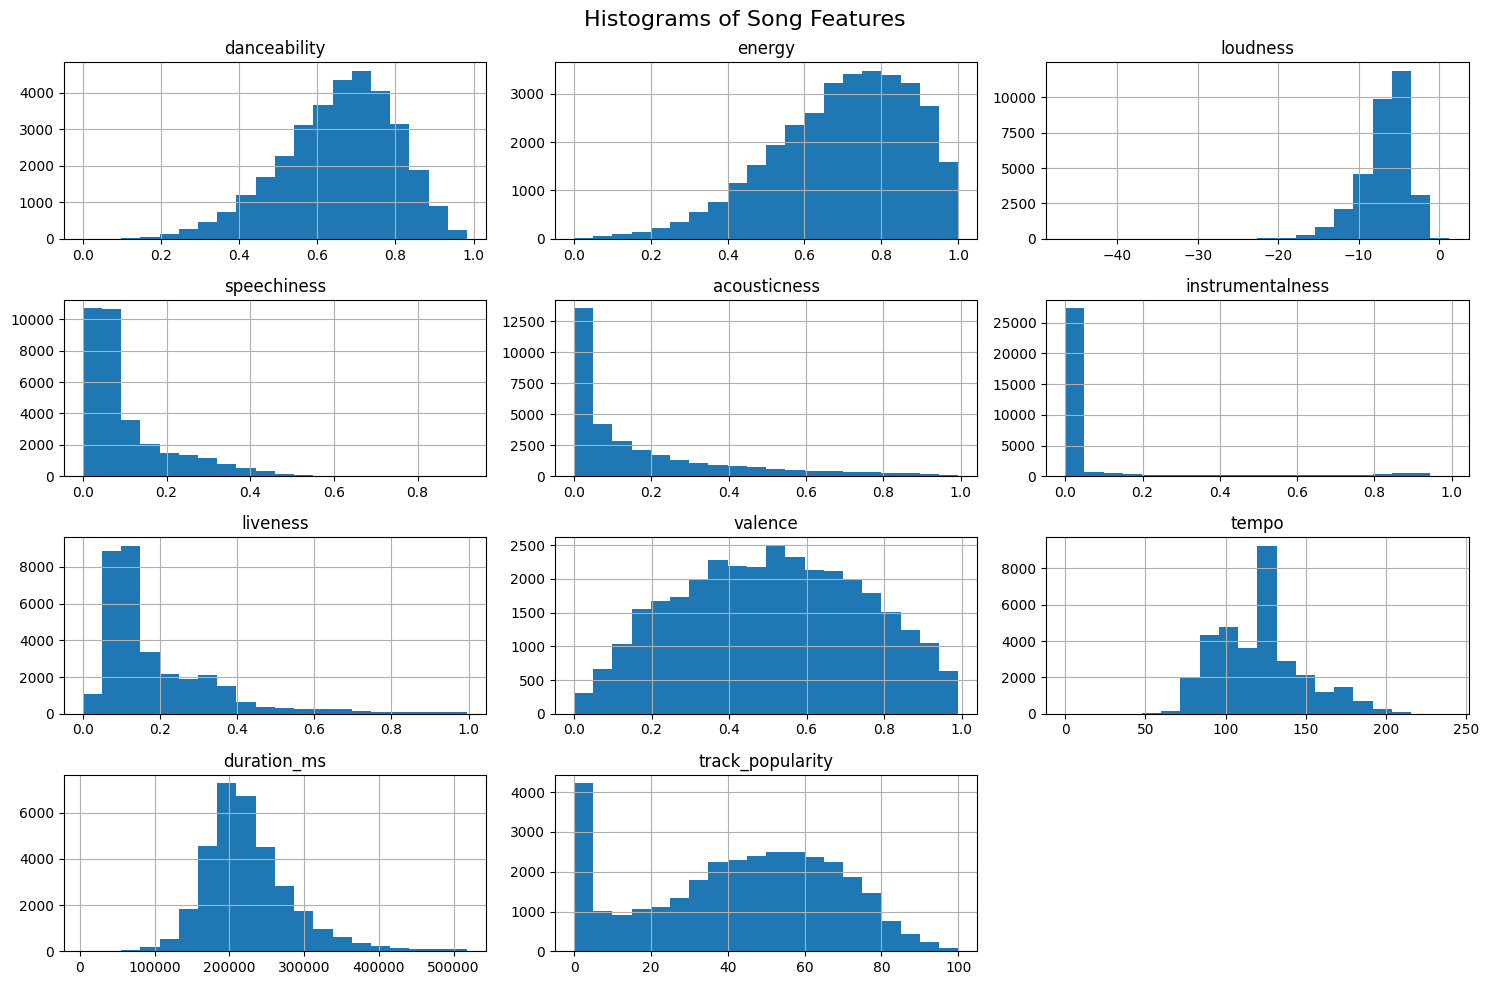

In [ ]:
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Song Features", fontsize=16)
plt.tight_layout()
plt.show()


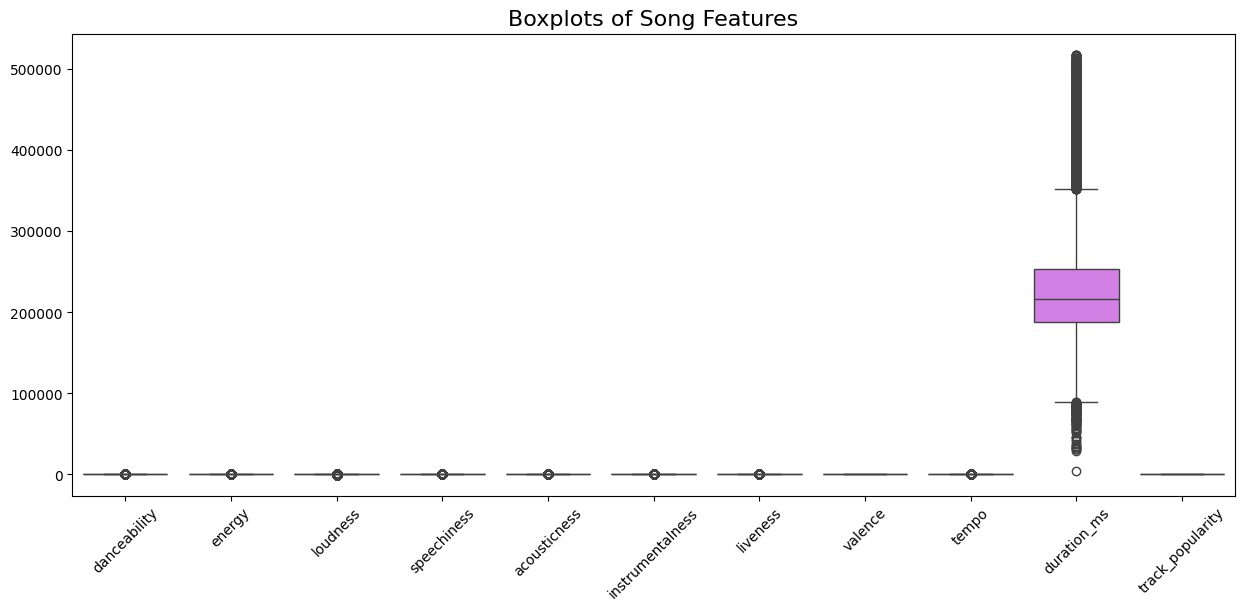

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_features])
plt.title("Boxplots of Song Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()


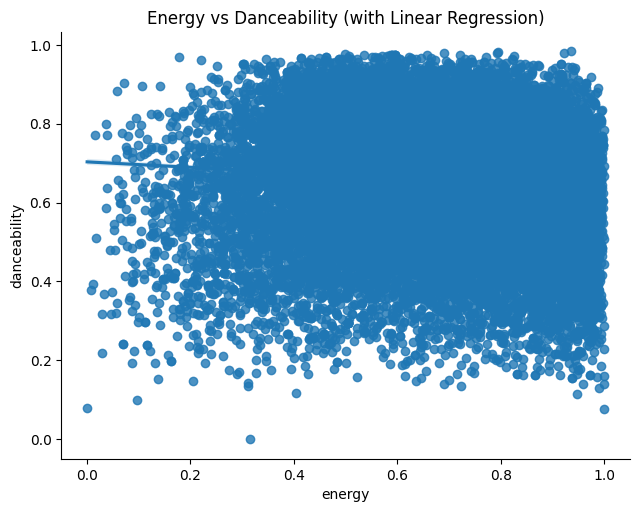

In [ ]:
sns.lmplot(x='energy', y='danceability', data=df, height=5, aspect=1.3)
plt.title("Energy vs Danceability (with Linear Regression)")
plt.show()


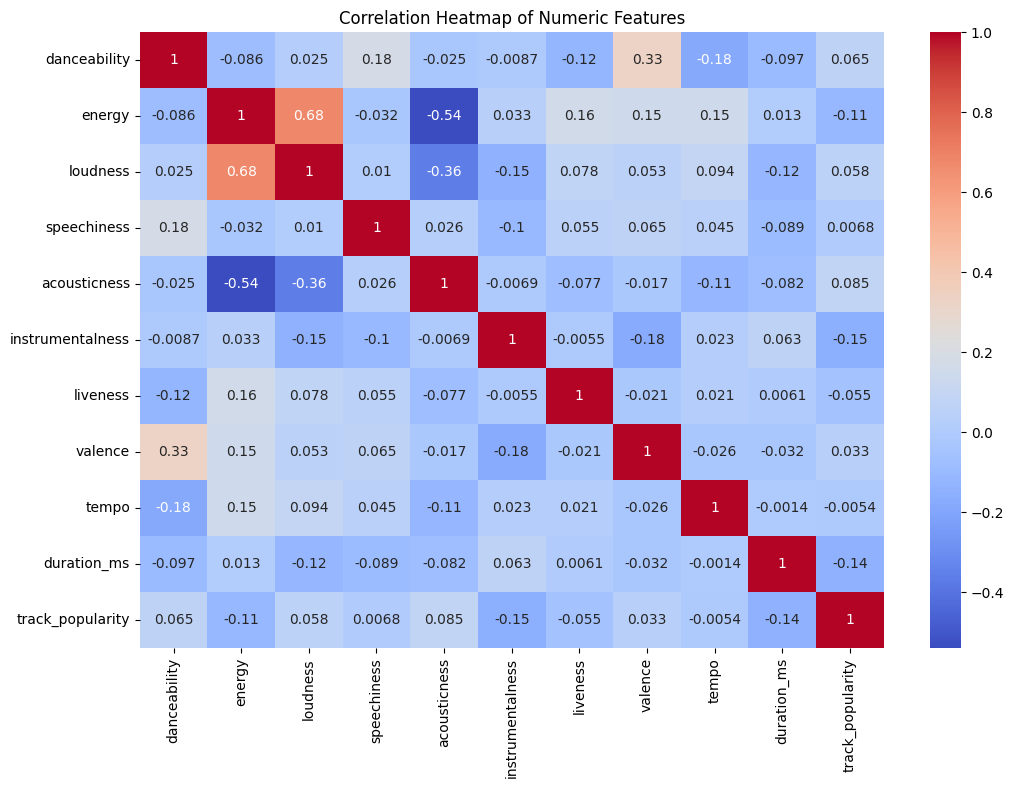

In [ ]:
plt.figure(figsize=(12, 8))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Mean Squared Error: 576.74
R² Score: 0.07


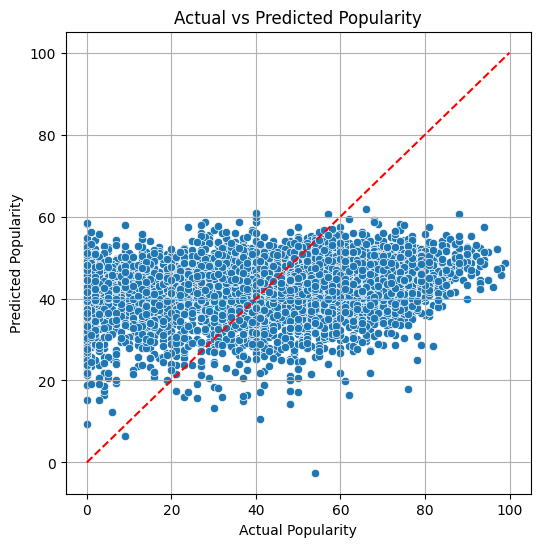

In [29]:
# === IMPORTS ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === LOAD AND CLEAN DATA ===
df = pd.read_csv("spotify_songs.csv")
df.columns = df.columns.str.strip().str.lower()  # clean column names

# Define numeric audio features to use as inputs
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

# Convert to numeric (in case some are stored as strings)
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in input features or target
df = df.dropna(subset=features + ['track_popularity'])

# === SPLIT DATA ===
X = df[features]
y = df['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === TRAIN MODEL ===
model = LinearRegression()
model.fit(X_train, y_train)

# === EVALUATE MODEL ===
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# === VISUALIZE PREDICTIONS ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.grid(True)
plt.show()
